In [1]:
class Cashflow:
    def __init__(self, val,t,r):
        self.val = val
        self.t = t
        self.r = r
        self.PV = self.valAt(0)
    def valAt(self,time):
        return self.val*(1+self.r)**(time-self.t)
def NPV(arr):
    return sum([x.PV for x in arr])
print(NPV([Cashflow(-1500,0,.05),Cashflow(1000,1,.05),Cashflow(1000,2,.05)]))

359.41043083900206


In [2]:
class Cashflow:
    def __init__(self, val,t,r):
        self.val = val
        self.t = t
        self.r = r
        self.PV = self.valAt(0)
    def valAt(self,time):
        return self.val*(1+self.r)**(time-self.t)
    def tryR(self,r):
        return self.val*(1+r)**(0-self.t)

In [3]:
def NPV2(r,arr):
    return sum([x.tryR(r) for x in arr])

In [4]:
from scipy.optimize import fsolve
def findIRR(arr):
    return fsolve(NPV2, 0,(arr))

In [5]:
print(findIRR([Cashflow(-1500.0,0.0,.05),Cashflow(1000.0,1.0,.05),Cashflow(1000.0,2.0,.05)]))
print(NPV2(.215250437022,[Cashflow(-1500.0,0,.05),Cashflow(1000.0,1,.05),Cashflow(1000.0,2,.05)]))

[ 0.21525044]
-8.417373464908451e-10


In [6]:
flows = [Cashflow(-1500,0.0,.05),Cashflow(1000,1.0,.05),Cashflow(1000,2.0,.05)]
cutoff = findIRR(flows)[0]
r=0
decision1 ="Yes"
decision2 ="Yes"
for _ in range(50):
    value = NPV2(r,flows)
    if value>0:
        decision1 ="Yes"
    else:
        decision1 ="No"
    if r<cutoff:
        decision2 ="Yes"
    else:
        decision2 ="No"
    r+=.01
    print(value,decision1,decision2)

500.0 Yes Yes
470.39505930791086 Yes Yes
441.56093810073037 Yes Yes
413.46969554152145 Yes Yes
386.0946745562128 Yes Yes
359.41043083900206 Yes Yes
333.3926664293341 Yes Yes
308.01816752554805 Yes Yes
283.264746227709 Yes Yes
259.11118592711034 Yes Yes
235.53719008264443 Yes Yes
212.52333414495604 Yes Yes
190.05102040816348 Yes Yes
168.10243558618538 Yes Yes
146.66051092643897 Yes Yes
125.70888468809096 Yes Yes
105.23186682520816 Yes Yes
85.21440572722634 Yes Yes
65.64205688020695 Yes Yes
46.50095332250555 Yes Yes
27.777777777777942 Yes Yes
9.459736356806275 Yes Yes
-8.465466272507342 No No
-26.009650340405756 No No
-43.184183142559846 No No
-60.0 No No
-76.46762408667178 No No
-92.59718519437047 No No
-108.3984375 No No
-123.88077639564938 No No
-139.05325443787 No No
-153.92459646873726 No No
-168.50321395775939 No No
-182.79721861043595 No No
-196.8144352862555 No No
-210.56241426611814 No No
-224.04844290657456 No No
-237.2795567158613 No No
-250.2625498844783 No No
-263.0039853009

In [7]:
flows = [Cashflow(1500,0.0,.05),Cashflow(-1000,1.0,.05),Cashflow(-1000,2.0,.05)]
cutoff = findIRR(flows)[0]
r=0
decision1 ="Yes"
decision2 ="Yes"
for _ in range(50):
    value = NPV2(r,flows)
    if value>0:
        decision1 ="Yes"
    else:
        decision1 ="No"
    if r<cutoff:
        decision2 ="Yes"
    else:
        decision2 ="No"
    r+=.01
    print(value,decision1,decision2)

-500.0 No Yes
-470.39505930791086 No Yes
-441.56093810073037 No Yes
-413.46969554152145 No Yes
-386.0946745562128 No Yes
-359.41043083900206 No Yes
-333.3926664293341 No Yes
-308.01816752554805 No Yes
-283.264746227709 No Yes
-259.11118592711034 No Yes
-235.53719008264443 No Yes
-212.52333414495604 No Yes
-190.05102040816348 No Yes
-168.10243558618538 No Yes
-146.66051092643897 No Yes
-125.70888468809096 No Yes
-105.23186682520816 No Yes
-85.21440572722634 No Yes
-65.64205688020695 No Yes
-46.50095332250555 No Yes
-27.777777777777942 No Yes
-9.459736356806275 No Yes
8.465466272507342 Yes No
26.009650340405756 Yes No
43.184183142559846 Yes No
60.0 Yes No
76.46762408667178 Yes No
92.59718519437047 Yes No
108.3984375 Yes No
123.88077639564938 Yes No
139.05325443787 Yes No
153.92459646873726 Yes No
168.50321395775939 Yes No
182.79721861043595 Yes No
196.8144352862555 Yes No
210.56241426611814 Yes No
224.04844290657456 Yes No
237.2795567158613 Yes No
250.2625498844783 Yes No
263.00398530096

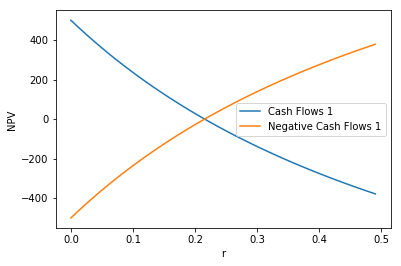

In [8]:
import matplotlib.pyplot as plt

flows = [Cashflow(-1500,0,.05),Cashflow(1000,1,.05),Cashflow(1000,2,.05)]

r = 0
rates=[]
values=[]
for _ in range(50):
    rates+=[r]
    values+=[NPV2(r,flows)]
    r+=.01
plt.plot(rates,values)

flows = [Cashflow(1500,0,.05),Cashflow(-1000,1,.05),Cashflow(-1000,2,.05)]

r = 0
rates=[]
values=[]
for _ in range(50):
    rates+=[r]
    values+=[NPV2(r,flows)]
    r+=.01
plt.plot(rates,values)
plt.xlabel("r")
plt.ylabel("NPV")
plt.legend(["Cash Flows 1","Negative Cash Flows 1"])

plt.show()

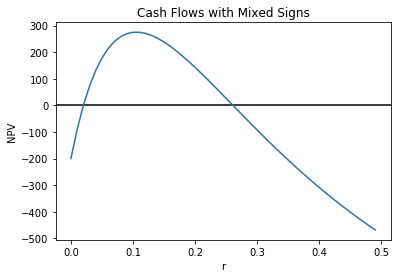

In [9]:
flows = [Cashflow(-1200,0,.05),Cashflow(2000,3,.05),Cashflow(2000,6,.05),Cashflow(-3000,10,.05)]

r = 0
rates=[]
values=[]
for _ in range(50):
    rates+=[r]
    values+=[NPV2(r,flows)]
    r+=.01
plt.axhline(0, color='black')
plt.plot(rates,values)
plt.xlabel("r")
plt.ylabel("NPV")
plt.title("Cash Flows with Mixed Signs")
plt.show()